In [2]:
from numpy import*
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.time()
def f(u,t):
    return u + t ** 2 + 1
def increment(f, t, y, tau):# поиск приближённого решения методом Рунге—Кутта—Фельберга.
    k1=f(y,t)
    k2=f(y + tau*k1/2, t + tau/2)
    k3 =f(y + tau*k2/2, t + tau/2)
    k4 = f(y + tau*k3, t + tau)
    return (k1 + 2*k2 +2*k3 + k4)/6
def rungeKutta(f, to, yo, tEnd, tau):
    t = [] #подготовка пустого списка t
    y = [] #подготовка пустого списка y
    t.append(to)#внесение в список t начального значения to
    y.append(yo)#внесение в список y начального значения yo
    while to < tEnd: #внесение результатов расчёта в массивы t,y
        yo = yo + tau* increment(f, to, yo, tau) # расчёт значения в точке t0,y0 для задачи Коши
        to = to + tau # приращение времени
        t.append(to) # заполнение массива t
        y.append(yo) # заполнение массива y
    return t, y
def effective_p(U2,U1,U0,r):
    return np.log((U2-U1)/(U1-U0))/np.log(r)
to = 0# начальный момент отсчёта времени
tEnd = 1 # конечный момент отсчёта времени
yo = 0.5 # начальные условия  
Y = []
for i in range(8):
    tau = 1/(2 ** i)
    t,y = rungeKutta(f, to, yo, tEnd, tau)
    Y.append(y)
stop = time.time()

In [3]:
print(stop)

1619078772.3032238


In [4]:
r = []
ep = []
for i in range(len(Y)):
    if(i > 1):
        r.append(2 ** (i + 1))
        ep.append(effective_p(Y[i][-1], Y[i-1][-1], Y[i - 2][-1], 1/2))
        print(2 ** (i + 1), effective_p(Y[i][-1], Y[i-1][-1], Y[i - 2][-1], 1/2))

8 3.1285646636813165
16 3.57530560557217
32 3.7906175568693135
64 3.8960508470410455
128 3.94820995656561
256 3.9741518674699443


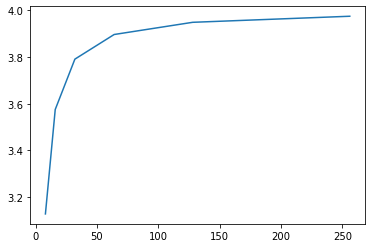

In [5]:
plt.plot(r, ep)

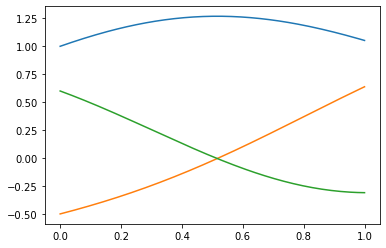

In [10]:
def rungeKutta2(f, u0, t):
    u = np.array([u0]*len(t))
    for i,ui in enumerate(u[:-1]):
        tau = t[i+1] - t[i]
        w1 = f(ui,t[i])
        w2 = f(ui + tau*w1/2, t[i] + tau/2)
        w3 = f(ui + tau*w2/2, t[i] + tau/2)
        w4 = f(ui + tau*w3, t[i] + tau)
        u[i+1] = ui + tau * (w1 + 2*w2 +2*w3 + w4)/6
    return u,t

from numpy import sin, cos, pi
def f1(u, t):
    om = [sin(t), cos(t), sin(t+pi/4)]
    Omega = np.matrix([[0, -om[2], om[1]], [om[2], 0, -om[0]],[-om[1], om[0], 0]])
    return Omega*u
answers1 = [ rungeKutta2(f1, np.matrix('1; -0.5; 0.6'), np.linspace(0, 1, 2**i + 1)) for i in range(8) ]
plt.figure()
plt.plot(answers1[-1][1], [t.item(0,0)for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t.item(1,0)for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t.item(2,0)for t in answers1[-1][0]])

In [11]:
butcher = [ np.array([0, 0, 0, 0, 0, 0, 0]), np.array([4/7, 0, 0, 0, 0, 0, 0]), np.array([115/112, -5/16, 0, 0, 0, 0, 0]), np.array([589/630, 5/18, -16/45, 0, 0, 0, 0]),
np.array([229/1200-29/6000*5**0.5, 119/240-187/1200*5**0.5, -14/75+34/375*5**0.5, -3/100*5**0.5, 0, 0, 0]),
np.array([71/2400-587/12000*5**0.5, 187/480-391/2400*5**0.5, -38/75+26/375*5**0.5, 27/80-3/400*5**0.5, (1+5**0.5)/4, 0, 0]),
np.array([-49/480+43/160*5**0.5, -425/96+51/32*5**0.5, 52/15-4/5*5**0.5, -27/16+3/16*5**0.5, 5/4-3/4*5**0.5, 5/2-0.5*5**0.5, 0]) ]
a = np.array([0, 4/7, 5/7, 6/7, (5-5**0.5)/10, (5+5**0.5)/10, 1]);
b = np.array([1/12, 0, 0, 0, 5/12, 5/12, 1/12]);
u0 = np.array([1, -0.5, 0.6])

In [12]:
def mult(vect,list_):
    res = np.matrix(np.zeros(vect[0].shape))
    for v,l in zip(vect,list_):
        res+= v*l
    return res
def universal_runge_kutta(f ,u0, t, butcher, a, b):
    u = np.array([u0] * len(t))
    w = [np.matrix(np.zeros(u0.shape))] * len(butcher)
    for i,ui in enumerate(u[:-1]):
        tau = t[i+1] - t[i]
        for j,wj in enumerate(w):
            w[j] = f(ui + tau * mult(w, butcher[j]),t[i] + tau * a[j])
        u[i+1] = ui + tau * mult(w,b)
    return u, t

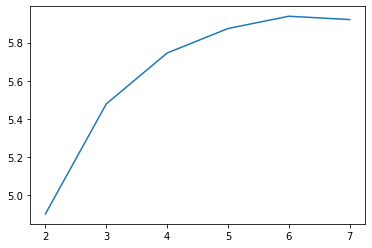

In [13]:
answers2 = [ universal_runge_kutta(f, np.matrix([[0.5]]),np.linspace(0, 1, 2**i + 1), butcher, a, b) for i in range(8)]
effective_p_in_1_2 = [effective_p(answers2[i][0][-1], answers2[i-1][0][-1], answers2[i-2][0][-1], 1/2) for i in range(2, len(answers2))]
plt.plot(range(2,len(answers2)), [t[0][0] for t in effective_p_in_1_2])

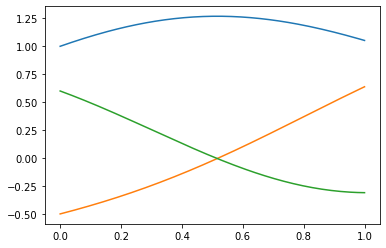

In [14]:
answers3 = [ universal_runge_kutta(f1, np.matrix('1; -0.5; 0.6'), np.linspace(0, 1, 2**i + 1), butcher, a, b) for i in range(15) ]
plt.figure()
plt.plot(answers1[-1][1], [t.item(0,0)for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t.item(1,0)for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t.item(2,0)for t in answers1[-1][0]])